In [2]:
import numpy as np
import numpy.linalg as la
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io

In [3]:
# MAT 파일 불러오기
mat_path = r"/Users/toastceo/Desktop/연세대/과제/HW1_package/hw1_prob1.mat"
mat_data = scipy.io.loadmat(mat_path)

In [4]:
# 변수 준비
# 각 변수 배열 할당 (k, m, n, T)
k = np.squeeze(np.log(np.array(mat_data["k"])))
m = np.squeeze(np.log(np.array(mat_data["m"])))
n = np.squeeze(np.log(np.array(mat_data["n"])))
T = np.squeeze(np.log(np.array(mat_data["T"])))
N = 30

# log a를 위해 A의 0번째 열은 1로 채워줘야함. 따라서 ones 함수 사용
A = np.ones((N, 4))
A_T = np.transpose(A,(1,0))

# k, m, n 변수들을 A행렬에 넣어준다  
A[:,1] = k
A[:,2] = m
A[:,3] = n

In [5]:
# x = (A^T * A)^-1 * A^T * b 
# matmul -> 행렬의 크기가 같을 때 사용할 수 있음
ATA_I = np.linalg.inv(np.matmul(A_T, A))
ATA_I_AT = np.matmul(ATA_I, A_T)
x = np.matmul(ATA_I_AT, T)

# x의 값: 즉 log α, β, γ, δ
print("alpha", np.exp(x[0]))
print("beta", x[1])
print("gamma", x[2])
print("delta", x[3])

alpha 9.336394292787991e-15
beta 3.1062144976045802
gamma 1.0942886079686671
delta 2.1077985665372028


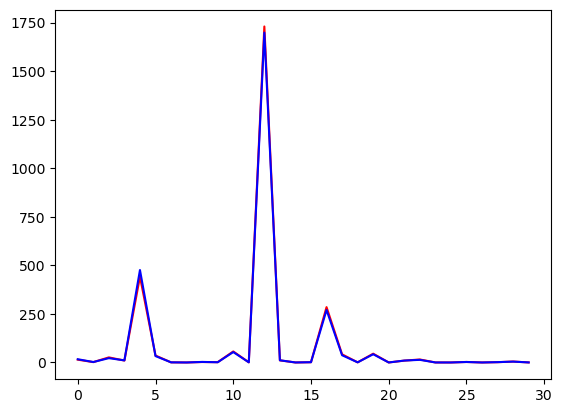

예측값: 16.706491394793442 실제값: 14.399999999999999
예측값: 2.2906725566212884 실제값: 1.89
예측값: 22.280140430263113 실제값: 26.2
예측값: 10.847063601581299 실제값: 9.839999999999998
예측값: 476.12449235439726 실제값: 441.9999999999999
예측값: 33.00657450761762 실제값: 35.699999999999996
예측값: 0.65720937498108 실제값: 0.624
예측값: 0.0013246458361758932 실제값: 0.00137
예측값: 2.8219196529476225 실제값: 2.37
예측값: 1.1990803410400939 실제값: 1.48
예측값: 53.641837380039256 실제값: 56.800000000000004
예측값: 0.828171250568785 실제값: 0.816
예측값: 1698.3291638255366 실제값: 1729.9999999999995
예측값: 11.351295256992074 실제값: 10.8
예측값: 0.04036937363464924 실제값: 0.040999999999999995
예측값: 1.4024010673585217 실제값: 1.28
예측값: 270.33239991212554 실제값: 285.00000000000006
예측값: 37.26065656398474 실제값: 41.9
예측값: 0.6694391464852718 실제값: 0.691
예측값: 42.417769928638016 실제값: 45.20000000000001
예측값: 0.022877520103951964 실제값: 0.020700000000000003
예측값: 9.853135987873507 실제값: 9.579999999999998
예측값: 13.621466327392245 실제값: 15.400000000000002
예측값: 0.08872193506862626 실제값: 0.0978
예측값: 0.

In [6]:
T_hat = np.matmul(A, x)
l_30 = [i for i in range(30)]


plt.plot(l_30, np.exp(T), "r")
plt.plot(l_30, np.exp(T_hat), "b")
plt.show()


for i in range(len(T_hat)):
    print("예측값:", float(np.exp(T_hat[i])),"실제값:", float(np.exp(T[i])))